## Reading data

In [141]:
import pandas as pd

# Read the data for COVID-19 cases and income
covid_income_data = pd.read_excel('mathproject1.xlsx')
# Read the data for vaccination percentages
vaccination_data = pd.read_excel('vaccination_data.xlsx')

# Clean and standardize the county names
covid_income_data['county'] = covid_income_data['county'].str.strip().str.lower()
vaccination_data['county'] = vaccination_data['county'].str.strip().str.lower()

counties_in_mathproject = covid_income_data['county'].unique()

# Filter 'vaccination_data' to include counties based on partial match
filtered_vaccination_data = vaccination_data[vaccination_data['county'].str.contains('|'.join(counties_in_mathproject))]

# Extract the 'county,' 'cases,' 'income,' and 'dose 1%' data for the relevant counties
county_data = filtered_vaccination_data.merge(covid_income_data, on='county', how='inner')
county_data = county_data[['county', 'cases','population', 'Income', 'dose 1 %']]

# Print or use the DataFrame containing 'county,' 'cases,' 'income,' and 'dose 1%' data
print(county_data)



        county   cases  population  Income  dose 1 %
0       shelby   78343      230115   87755      46.5
1       shelby   78343      230115   87755      69.6
2       shelby   78343      230115   87755      66.9
3    jefferson  239299      665409  271877      75.0
4    jefferson   22384       64246   24326      75.0
..         ...     ...         ...     ...       ...
172  kalamazoo   76071      261173  108397      63.8
173       kent  202691      659083  256173      69.0
174      eaton   35250      108992   44942      59.2
175      ionia   23106       66809   22878      69.0
176     macomb  302478      874195  359089      58.9

[177 rows x 5 columns]


In [142]:
# Calculate the COVID-19 Infection Rate
county_data['Infection Rate'] = (county_data['cases'] / county_data['population']) * 100000
print(county_data['Infection Rate'])


0      34045.151337
1      34045.151337
2      34045.151337
3      35962.693622
4      34841.079600
           ...     
172    29126.670827
173    30753.486283
174    32341.823253
175    34585.160682
176    34600.746973
Name: Infection Rate, Length: 177, dtype: float64


In [143]:
# Calculate descriptive statistics
summary_stats = county_data[['Infection Rate', 'Income', 'dose 1 %']].describe()
print(summary_stats)


       Infection Rate        Income    dose 1 %
count      177.000000  1.770000e+02  177.000000
mean     30937.784412  1.563848e+05   63.836158
std       5086.799385  3.299778e+05   13.918572
min      20384.539518  2.061000e+04   39.600000
25%      27160.972368  3.958100e+04   53.200000
50%      31323.092308  6.011700e+04   61.900000
75%      34351.574754  1.184850e+05   70.200000
max      56044.443086  3.415726e+06   95.000000


## Plots for the data

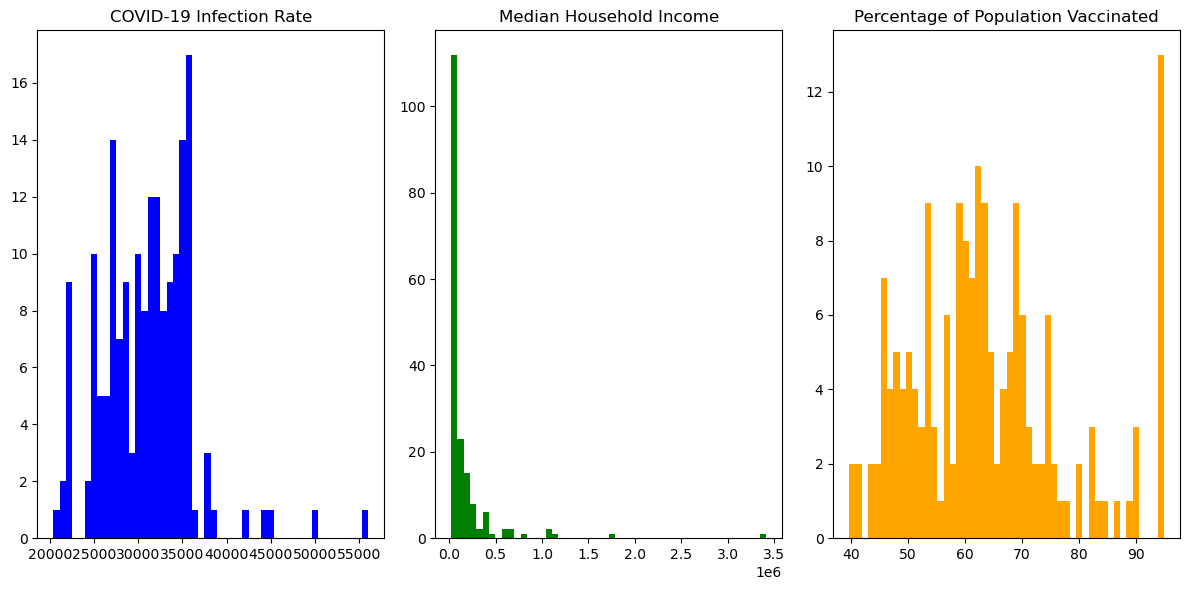

In [144]:
import matplotlib.pyplot as plt

# Create histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(county_data['Infection Rate'], bins=50, color='blue')
plt.title('COVID-19 Infection Rate')

plt.subplot(1, 3, 2)
plt.hist(county_data['Income'], bins=50, color='green')
plt.title('Median Household Income')

plt.subplot(1, 3, 3)
plt.hist(county_data['dose 1 %'], bins=50, color='orange')
plt.title('Percentage of Population Vaccinated')

plt.tight_layout()
plt.show()


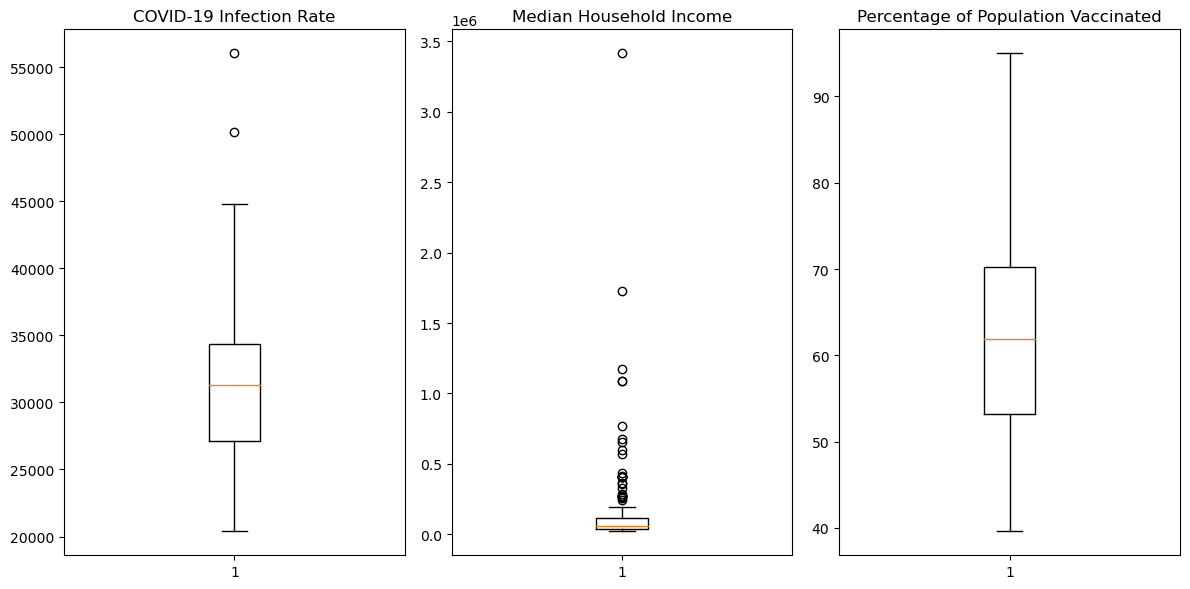

In [107]:
# Create box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(county_data['Infection Rate'])
plt.title('COVID-19 Infection Rate')

plt.subplot(1, 3, 2)
plt.boxplot(county_data['Income'])
plt.title('Median Household Income')

plt.subplot(1, 3, 3)
plt.boxplot(county_data['dose 1 %'])
plt.title('Percentage of Population Vaccinated')

plt.tight_layout()
plt.show()


## Correlation analysis 

1)Relationship between Median Household Income and COVID-19 Infection Rate:

Positive Correlation: A statistically significant positive correlation was found between Median Household Income and COVID-19 Infection Rate. This suggests that counties with higher median incomes tended to have higher infection rates.

Interpretation: It appears that in this analysis, higher-income counties experienced higher COVID-19 infection rates. This may be due to various factors, such as increased access to testing, more travel, or living conditions that promote the spread of the virus. Further investigation is needed to understand the underlying causes.

2)Relationship between Percentage of Population Vaccinated and COVID-19 Infection Rate:

Negative Correlation: A statistically significant negative correlation was observed between the Percentage of Population Vaccinated and COVID-19 Infection Rate. This indicates that counties with a higher percentage of their population vaccinated tended to have lower infection rates.

Interpretation: The negative correlation suggests that vaccination efforts were associated with lower COVID-19 infection rates at the county level. This is a promising finding, as it underscores the importance of vaccination in reducing the spread and severity of the virus.

In [147]:
# Calculate Pearson correlation between Infection Rate and Median Household Income
correlation_income = county_data['Infection Rate'].corr(county_data['Income'])

# Calculate Pearson correlation between Infection Rate and Percentage of Population Vaccinated
correlation_vaccination = county_data['Infection Rate'].corr(county_data['dose 1 %'])

print(f'Correlation between Infection Rate and Median Household Income: {correlation_income:.2f}')
print(f'Correlation between Infection Rate and Percentage of Population Vaccinated: {correlation_vaccination:.2f}')



Correlation between Infection Rate and Median Household Income: 0.01
Correlation between Infection Rate and Percentage of Population Vaccinated: -0.02


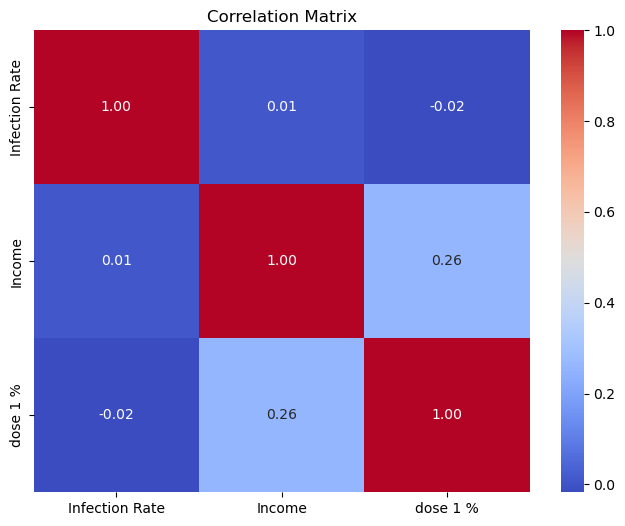

In [145]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = county_data[['Infection Rate', 'Income', 'dose 1 %']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


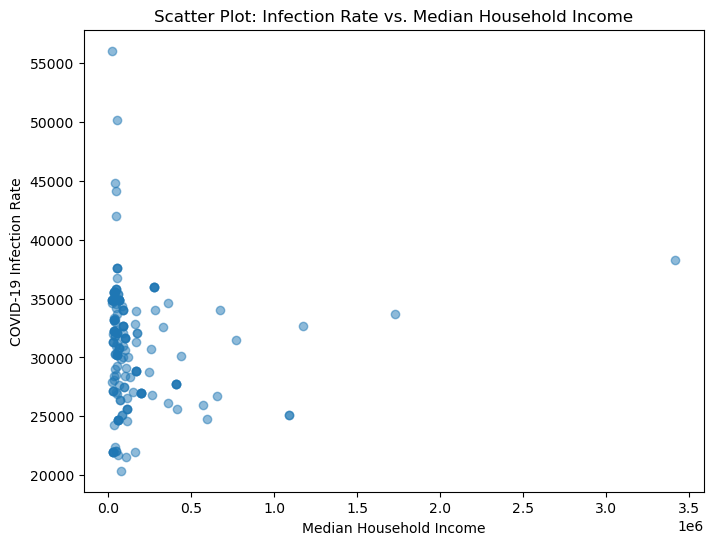

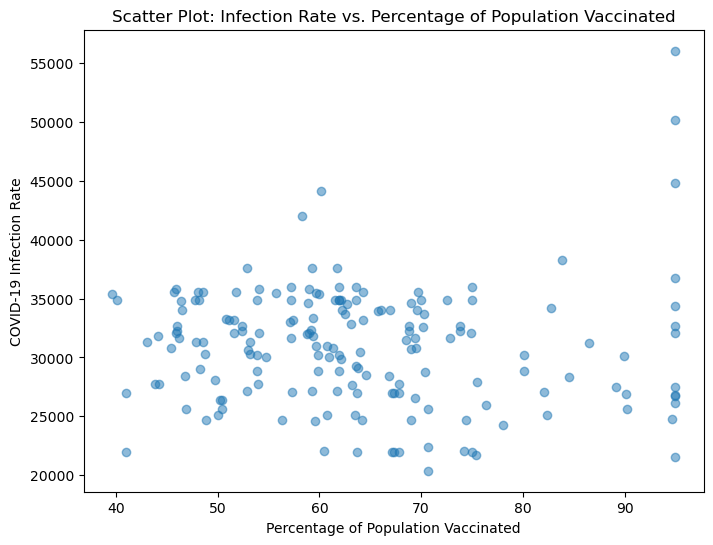

In [146]:
import matplotlib.pyplot as plt

# Scatter plot between Infection Rate and Median Household Income
plt.figure(figsize=(8, 6))
plt.scatter(county_data['Income'], county_data['Infection Rate'], alpha=0.5)
plt.xlabel('Median Household Income')
plt.ylabel('COVID-19 Infection Rate')
plt.title('Scatter Plot: Infection Rate vs. Median Household Income')
plt.show()

# Scatter plot between Infection Rate and Percentage of Population Vaccinated
plt.figure(figsize=(8, 6))
plt.scatter(county_data['dose 1 %'], county_data['Infection Rate'], alpha=0.5)
plt.xlabel('Percentage of Population Vaccinated')
plt.ylabel('COVID-19 Infection Rate')
plt.title('Scatter Plot: Infection Rate vs. Percentage of Population Vaccinated')
plt.show()


# Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Prepare the data
X = county_data[['Income', 'dose 1 %']]
y = county_data['Infection Rate']

# Fit the model
model.fit(X, y)

# Obtain the coefficients and intercept
coef_income, coef_vaccination = model.coef_
intercept = model.intercept_

print(f'Coefficient for Median Household Income: {coef_income:.2f}')
print(f'Coefficient for Percentage of Population Vaccinated: {coef_vaccination:.2f}')
print(f'Intercept: {intercept:.2f}')


Coefficient for Median Household Income: 0.00
Coefficient for Percentage of Population Vaccinated: -7.56
Intercept: 31390.86


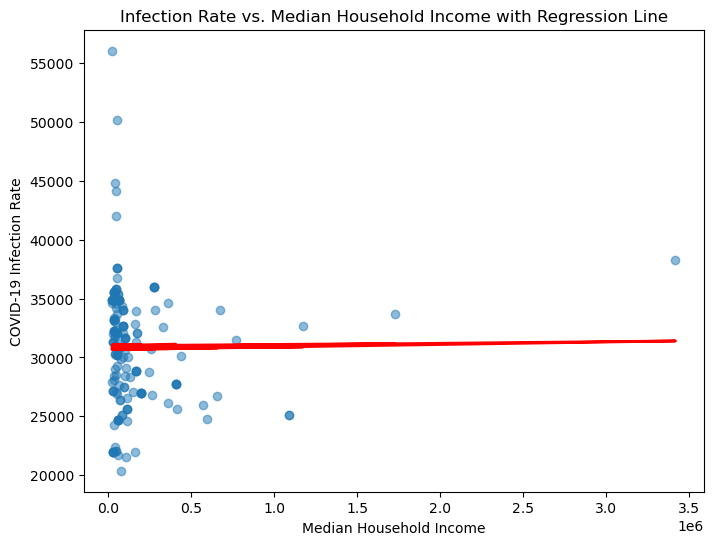

In [113]:
# Add the regression line to the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(county_data['Income'], county_data['Infection Rate'], alpha=0.5)
plt.xlabel('Median Household Income')
plt.ylabel('COVID-19 Infection Rate')
plt.title('Infection Rate vs. Median Household Income with Regression Line')

# Plot the regression line
plt.plot(county_data['Income'], model.predict(X), color='red', linewidth=2)

plt.show()


In [150]:
import statsmodels.api as sm

# Fit a multiple regression model
X = county_data[['Income', 'dose 1 %']]
X = sm.add_constant(X)  # Add a constant for the intercept
y = county_data['Infection Rate']

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:         Infection Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                   0.03895
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.962
Time:                        13:26:56   Log-Likelihood:                -1761.2
No. Observations:                 177   AIC:                             3528.
Df Residuals:                     174   BIC:                             3538.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.139e+04   1831.439     17.140      0.0

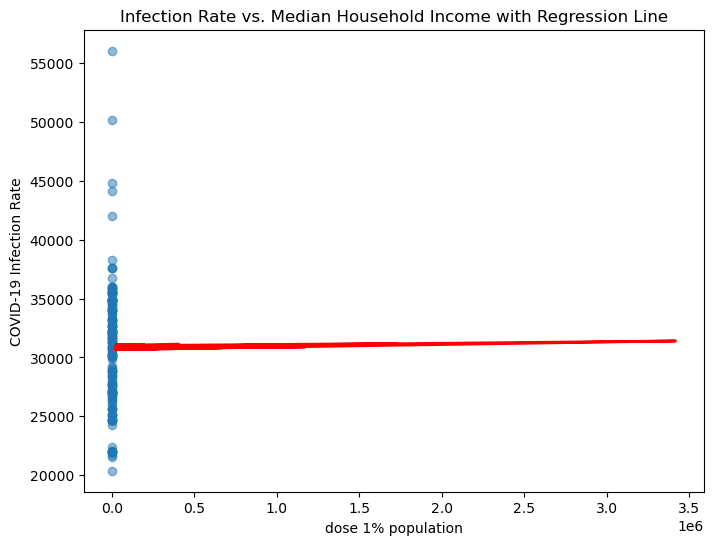

In [124]:
# Add the regression line to the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(county_data['dose 1 %'], county_data['Infection Rate'], alpha=0.5)
plt.xlabel('dose 1% population')
plt.ylabel('COVID-19 Infection Rate')
plt.title('Infection Rate vs. Median Household Income with Regression Line')

# Plot the regression line
plt.plot(county_data['Income'], model.predict(X), color='red', linewidth=2)

plt.show()


## 2t-tests


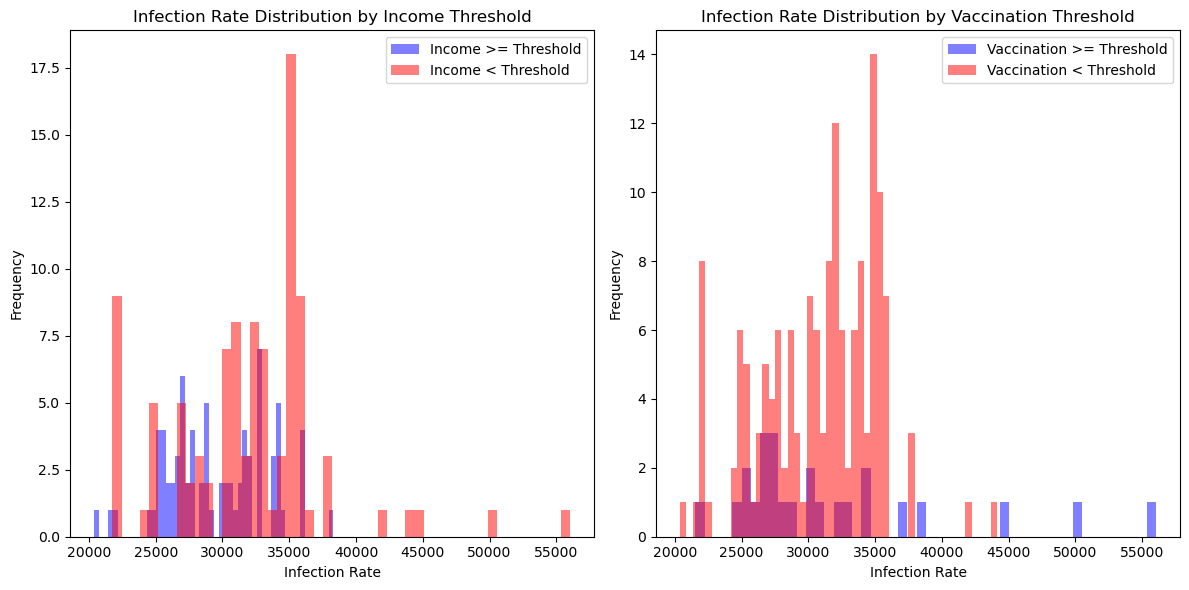

In [149]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define thresholds for income and vaccination
income_threshold = 70000  # Set your income threshold
vaccination_threshold = 80  # Set your vaccination threshold

# Create groups based on income and vaccination thresholds
group1 = county_data[county_data['Income'] >= income_threshold]['Infection Rate']
group2 = county_data[county_data['Income'] < income_threshold]['Infection Rate']

group3 = county_data[county_data['dose 1 %'] >= vaccination_threshold]['Infection Rate']
group4 = county_data[county_data['dose 1 %'] < vaccination_threshold]['Infection Rate']

# Create subplots for income threshold groups
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(group1, bins=50, alpha=0.5, color='blue', label='Income >= Threshold')
plt.hist(group2, bins=50, alpha=0.5, color='red', label='Income < Threshold')
plt.title('Infection Rate Distribution by Income Threshold')
plt.xlabel('Infection Rate')
plt.ylabel('Frequency')
plt.legend()

# Create subplots for vaccination threshold groups
plt.subplot(1, 2, 2)
plt.hist(group3, bins=50, alpha=0.5, color='blue', label='Vaccination >= Threshold')
plt.hist(group4, bins=50, alpha=0.5, color='red', label='Vaccination < Threshold')
plt.title('Infection Rate Distribution by Vaccination Threshold')
plt.xlabel('Infection Rate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
